In [97]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('monokai')

In [88]:
import numpy as np
import pandas as pd

## Basic DataFrame
Consider the following Python dictionary data and Python List labels:

    data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
    
        age : [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
    
        priority :  ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']} 
    
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

### 1. 
    i. Create a Dataframe birds from the above dictionary data which has the index labels.
    ii. Display basic information about the dataFrame
    iii. Show alternative rows of the dataframe

In [3]:
data = {
    'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
    'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
    'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']
}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [4]:
# 1
df = pd.DataFrame(data=data, index=labels)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [5]:
df.describe()

,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [7]:
df.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


### 2:
    i. Show only rows[1st, 3rd, 7th] from columns ['bird','age']
    ii Select rows where the number of visits is less than 4.

In [8]:
# i)
df[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [9]:
## ii.
df[df['visits'] < 4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### 3:
    i. Select all rows with nan values in age and visits columns
    ii. Fill nan with respective series mode value

In [10]:
df[['age', 'visits']].isnull().sum()

age       2
visits    0
dtype: int64

In [11]:
df[df.age.isnull() | df.visits.isnull()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [12]:
# ii.
df.age.fillna(df.age.mode()[0], inplace=True)

In [13]:
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [14]:
df.visits.fillna(df.visits.mode()[0], inplace=True)

In [15]:
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


### 4:
    i. Find the total number of visits of bird Cranes
    ii. Find the total number each type of birds in dataframe.
    iii. Print no of duplicate rows
    iv. Drop Duplicate rows and make this changes permanent. Show dataframe after changes

In [19]:
# i.
df[df.birds == 'Cranes'].visits.sum()

14

In [21]:
## ii.
df.birds.value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [25]:
# iii.
df.duplicated().sum()

2

In [31]:
# iv. 
df.drop_duplicates(inplace=True)

In [32]:
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


### 5: In IPL matches dataset some teams name has changes.

You will have to consider them as same.
    
    'Delhi Capitals' formerly as 'Delhi Daredevils' 
    'Punjab Kings' formerly as 'Kings XI Punjab'
    'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
    
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams. 

In [67]:
ipl_matches = pd.read_csv('Datasets/IPL_Matches_2008_2022.csv')
ipl_matches.sample(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
914,336018,Mumbai,2008-05-14,2007/08,36,Mumbai Indians,Chennai Super Kings,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,9.0,NaN,ST Jayasuriya,"['ST Jayasuriya', 'SR Tendulkar', 'RV Uthappa'...","['S Vidyut', 'SP Fleming', 'SK Raina', 'S Badr...",BR Doctrove,AM Saheba
847,392228,Johannesburg,2009-05-16,2009,48,Deccan Chargers,Kolkata Knight Riders,New Wanderers Stadium,Deccan Chargers,field,N,Deccan Chargers,Wickets,6.0,NaN,RG Sharma,"['AC Gilchrist', 'HH Gibbs', 'TL Suman', 'A Sy...","['BB McCullum', 'SC Ganguly', 'BJ Hodge', 'DJ ...",RE Koertzen,S Ravi
200,1178429,Bengaluru,2019-05-04,2019,54,Sunrisers Hyderabad,Royal Challengers Bangalore,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,4.0,NaN,SO Hetmyer,"['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...","['PA Patel', 'V Kohli', 'AB de Villiers', 'SO ...",AK Chaudhary,NJ Llong
40,1304080,Mumbai,2022-04-22,2022,34,Rajasthan Royals,Delhi Capitals,"Wankhede Stadium, Mumbai",Delhi Capitals,field,N,Rajasthan Royals,Runs,15.0,NaN,JC Buttler,"['JC Buttler', 'D Padikkal', 'SV Samson', 'SO ...","['PP Shaw', 'DA Warner', 'SN Khan', 'RR Pant',...",NA Patwardhan,Nitin Menon
868,392205,Port Elizabeth,2009-05-02,2009,25,Deccan Chargers,Rajasthan Royals,St George's Park,Deccan Chargers,bat,N,Rajasthan Royals,Wickets,3.0,NaN,YK Pathan,"['HH Gibbs', 'AC Gilchrist', 'AA Bilakhia', 'R...","['GC Smith', 'SA Asnodkar', 'LA Carseldine', '...",S Asnani,BG Jerling


In [71]:
changed_name = {
    'Delhi Daredevils':'Delhi Capitals',
    'Kings XI Punjab':'Punjab Kings',
    'Rising Pune Supergiants':'Rising Pune Supergiant'
}
ipl_matches.replace(changed_name.keys(), changed_name.values(), inplace=True)

### 6. Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL
Hint: Be careful the data is divided in 2 different cols [Teams1 & Team2]

<AxesSubplot:>

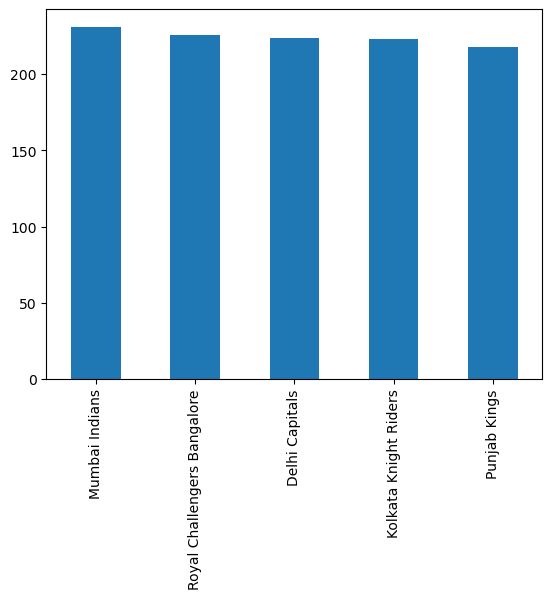

In [72]:
(ipl_matches['Team1'].value_counts() + ipl_matches['Team2'].value_counts()).sort_values(ascending=False).head(5).plot(kind='bar')

### 7. Player who got Most no. of player of the matches award playing against Mumbai Indians.
Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.

In [73]:
m1 = (ipl_matches.Team1 == 'Mumbai Indians') | (ipl_matches.Team2 == 'Mumbai Indians')
m2 = (ipl_matches.WinningTeam != 'Mumbai Indians')

ipl_matches[m1 & m2].Player_of_Match.value_counts()

SPD Smith     4
KL Rahul      4
SK Raina      4
JH Kallis     3
CH Gayle      3
             ..
JJ Bumrah     1
AJ Finch      1
SS Iyer       1
GJ Bailey     1
MV Boucher    1
Name: Player_of_Match, Length: 68, dtype: int64

### 8: Team1 vs Team2 Dashboard
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.

    team1_vs_team2('Kolkota Knight Riders','Chennai Super Kings')

In [74]:
def team1_vs_team2(t1, t2):
    m1 = (ipl_matches.Team1 == t1) | (ipl_matches.Team2 == t1)
    m2 = (ipl_matches.Team1 == t2) | (ipl_matches.Team2 == t2)
    
    df = ipl_matches[m1 & m2]
    print(df.WinningTeam.value_counts())
    print(df.Player_of_Match.value_counts().head(3))
    
team1_vs_team2('Kolkota Knight Riders','Chennai Super Kings')

Series([], Name: WinningTeam, dtype: int64)
Series([], Name: Player_of_Match, dtype: int64)


### 9. Find out the top 7 cities where the matches of kolkota knight riders are played frequently and plot the result as bar chart.
`.plot(kind='bar')`

In [94]:
# ipl_matches[((ipl_matches.Team1 == 'Kolkota Knight Riders') | (ipl_matches.Team2 == 'Kolkota Knight Riders'))].City.value_counts().head(7).plot(kind='bar')

### 10. Find out the average margin for the team Mumbai Indians for only the session 2011

In [95]:
ipl_matches[((ipl_matches.Team1 == "Mumbai Indians") | (ipl_matches.Team2 == "Mumbai Indians")) & (ipl_matches.Season == "2011")].Margin.mean()

19.25